# Math 753/853 HW7 ODEs

## Problem 1

Implement three Julia functions for numerical solution of 1st-order IVPs 

\begin{align*}
y' &= f(t,y) \\
y(t_0) & = y_0
\end{align*}

for forward Euler, Runge-Kutta 2nd order (midpoint method), and Runge-Kutta 4th order. The functions should take inputs `f, y0, t0, Î”t, N` and returns $N+1$-dimensional vectors `t` and `y`, where `t` is the vector of discrete times $t_n = t_0 + n \Delta t$ and `y` is the vector of approximate values of $y$ at those times, 
$y(t_0), y(t_1), y(t_2), \ldots$.

For `forwardeuler` and `rungekutta2`, feel free to copy code from the lecture notebook. 

In [2]:
function forwardeuler(f, y0, t0, Δt, N)
    y = zeros(N+1)
    t = t0 + (0:N)*Δt
     
    y[1] = y0
    
    for n=1:N
        y[n+1] = y[n] + Δt*f(t[n], y[n])
    end
    (t,y)
end

function rungekutta2(f, y0, t0, Δt, N) # a.k.a. midpoint method
    y = zeros(N+1)
    t = t0 + (0:N)*Δt
     
    y[1] = y0
    
    for n=1:N
        ymid = y[n] + Δt/2*f(t[n], y[n])
        tmid = t[n] + Δt/2
        
        y[n+1] = y[n] + Δt*f(tmid, ymid)
    end
    (t,y)
end

function rungekutta4(f, y0, t0, Δt, N) 
    y = zeros(N+1)
    t = t0 + (0:N)*Δt
    
    y[1] = y0
    
    for n=1:N
        s1 = f(t[n],y[n])
        s2 = f(t[n] + Δt/2, y[n] + (Δt/2)*s1)
        s3 = f(t[n] + Δt/2, y[n] + (Δt/2)*s2)
        s4 = f(t[n], y[n] + Δt*s3)
        y[n+1] = y[n] + (Δt/6)*(s1 + 2*s2 + 2*s3 + s4)
    end
    (t,y)
end

rungekutta4 (generic function with 1 method)

## Problem 2

Compare the three numerical solution methods on the initial value problem

\begin{align*}
    y' &= t y + t^3 \\
    y(0) &= 1
\end{align*}

to the true solution $y(t) = [2 + y(0)] \, e^{t^2/2} - t^2 - 2$ 
over the interval $0 \leq t \leq 2$.  Your comparison should consist of two plots. The first plot should show $y(t)$ versus $t$ for the true solution 
and the three numerical solutions. The second plot should show the global errors of the three methods at 
the last time step versus the time step $\Delta t$. 

For guidance on the plots and the structure of the computations to produce them, look at the lecture notebook for 2016-12-02.

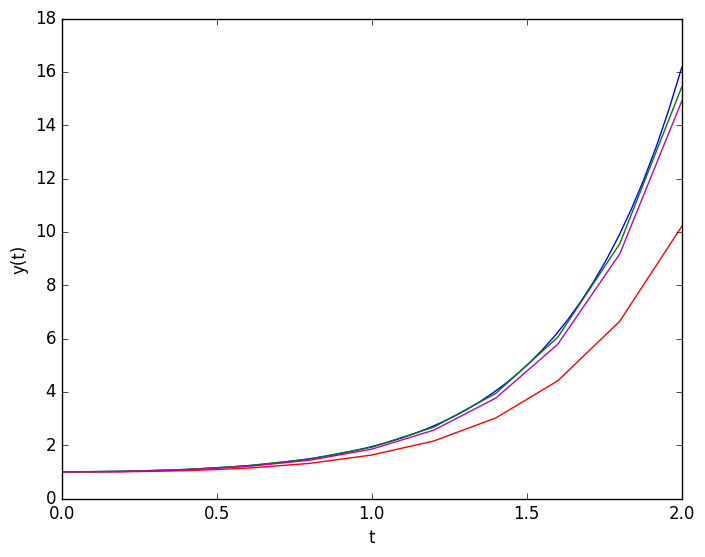

PyObject <matplotlib.text.Text object at 0x0000000028EA5CF8>

In [4]:
f(t,y) = t.*y + t.^3
y0 = 1
t0 = 0
Δt = 2/10
N = 10

using PyPlot
y_true(x) = [2 + y0].*e.^((x.^2)/2) - x.^2 - 2
t = linspace(0,2)
plot(t,y_true(t),"b-")

(p1,w) = forwardeuler(f,y0,t0,Δt,N)
(p2,u) = rungekutta2(f,y0,t0,Δt,N)
(p3,v) = rungekutta4(f,y0,t0,Δt,N)

plot(p1,w,"r-")
plot(p2,u,"g-")
plot(p3,v,"m-")

xlabel("t")
ylabel("y(t)")

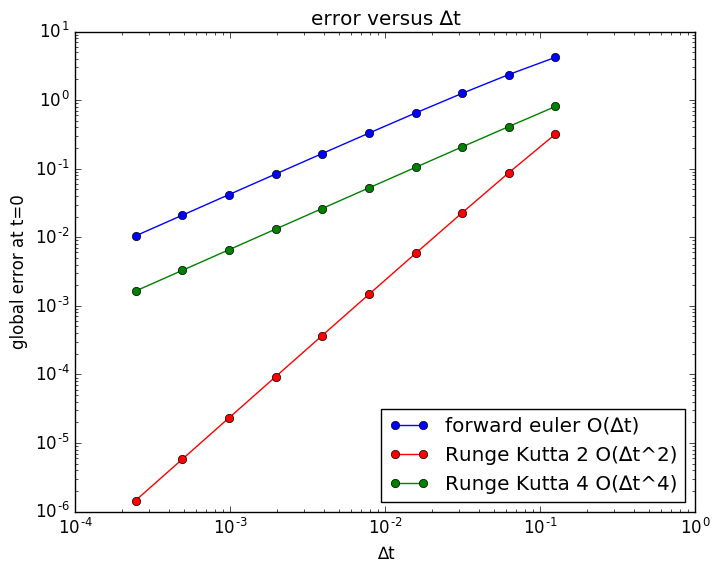

PyObject <matplotlib.legend.Legend object at 0x000000002934E080>

In [5]:
deltat_fe = zeros(0)
err_fe = zeros(0)
Δt_mp = zeros(0)
err_mp = zeros(0)
Δt_rk4 = zeros(0)
err_rk4 = zeros(0)

for i = 4:13
    N = 2^i
    Δt = (2)/N
    (tn, yn) = forwardeuler(f, y0, t0, Δt, N)
    
    push!(deltat_fe,  Δt)
    b = abs(yn[end]- y_true(tn[end])[1])
    push!(err_fe, b)
   
    (tnrk2, ynrk2) = rungekutta2(f, y0, t0, Δt, N)
    
    push!(Δt_mp,  Δt)
    push!(err_mp, abs(ynrk2[end]- y_true(tnrk2[end])[1]))
    
    (tnrk4, ynrk4) = rungekutta4(f, y0, t0, Δt, N)
    
    push!(Δt_rk4,  Δt)
    push!(err_rk4, abs(ynrk4[end]- y_true(tnrk4[end]))[1])
end

loglog(deltat_fe, err_fe, "bo-", label="forward euler O(∆t)")
loglog(Δt_mp, err_mp, "ro-", label="Runge Kutta 2 O(∆t^2)")
loglog(Δt_rk4, err_rk4, "go-", label="Runge Kutta 4 O(∆t^4)")
xlabel("∆t")
ylabel("global error at t=0")
title("error versus ∆t")
legend(loc="bottom left")

## Problem 3

Revise your three numerical IVP solvers to work when $y$ and $f$ are vector-valued. If $d$ is the dimension of $y$ and $f$, the `y` output should now be an $d \times (N+1)$ matrix, whose columns are the $d$-dimensional vectors $y(t_0), y(t_1), y(t_2), \ldots$. 


In [6]:
function forwardeuler(f, y0, t0, Δt, N)
    d = length(y0)
    y = zeros(d, N+1)
    t = t0 + (0:N)*Δt
     
    y[:, 1] = y0
    
    for i=1:d
        for n=1:N
            y[:, n+1] = y[:, n] + Δt*f(t[n], y[:,n])
        end
    end
    (t,y)
end

function rungekutta2(f, y0, t0, Δt, N) # a.k.a. midpoint method
    d = length(y0)
    y = zeros(d, N+1)
    t = t0 + (0:N)*Δt
     
    y[:,1] = y0
    
    for i=1:d
        for n=1:N
            ymid = y[:, n] + Δt/2*f(t[n], y[:,n])
            tmid = t[n] + Δt/2

            y[:, n+1] = y[:,n] + Δt*f(tmid, ymid)
        end
    end
    (t,y)
end

function rungekutta4(f, y0, t0, Δt, N) 
    d = length(y0)
    y = zeros(d, N+1)
    t = t0 + (0:N)*Δt
    
    y[:,1] = y0
    
    for i=1:d
        for n=1:N
            s1 = f(t[n],y[:,n])
            s2 = f(t[n] + Δt/2, y[:,n] + (Δt/2)*s1)
            s3 = f(t[n] + Δt/2, y[:,n] + (Δt/2)*s2)
            s4 = f(t[n], y[:,n] + Δt*s3)
            y[:,n+1] = y[:,n] + (Δt/6)*(s1 + 2*s2 + 2*s3 + s4)
        end
    end
    (t,y)
end

rungekutta4 (generic function with 1 method)

## Problem 4

The equations of motion for a small satellite orbiting a much more massive central body are

\begin{align*}
x'' &= -\frac{Gmx}{(x^2+y^2)^{3/2}} \\
y'' &= -\frac{Gmy}{(x^2+y^2)^{3/2}}
\end{align*}

In these equations, $(x,y)$ is the position of the satellite in the plane of the orbit, $G$ is the universal gravitational constant, and $m$ is the mass of the central body at the origin. 

**(a)** Convert this system of two second-order ODEs to a system of four first-order ODEs in the four variables $x, y, v_x, v_y$, where $v_x = x'$ and $v_y = y'$. 

**(b)** Write a Julia function `f(t,x)` that maps the vector $x = [x, y, v_x, v_y]$ into $x' = [x', y', v_x', v_y']$
according to the system of four first-order ODEs you derived in **(a)**. Since this is a math class and not a physics class, you can set the physical constant $G$ and $m$ to 1. 

**(c)** Compute numerical solutions to the system of ODEs using the initial condition 

\begin{align*} 
x(0) &= 1 \\
y(0) &= 0 \\
v_x(0) &= 0 \\
v_y(0) &= 0.6
\end{align*}

using Forward Euler, 2nd-order Runge-Kutta, and 4th-order Runge-Kutta, using $\Delta t = 0.04$ over the interval $0 \leq t \leq 10$ 

**(d)** Make a plot of the $x(t), y(t)$ orbit of the satellite as computed using the three time-stepping algorithms. Plot Forward Euler with a blue line, 2nd-order Runge-Kutta in red, and 4th-order Runge-Kutta in green. Make sure the axes are equispaced in $x$ and $y$ by using `axis("equal")`, and crop the plot to $-1 \leq x \leq 1.5$ and $-1.5 \leq y \leq 1$ using `xlim(-1, 1.5); ylim(-1.5, 1)`.

**(e)** Comment on your results. Describe the differences between the three approximate orbits. Which of them makes most sense from a physical perspective, and why?

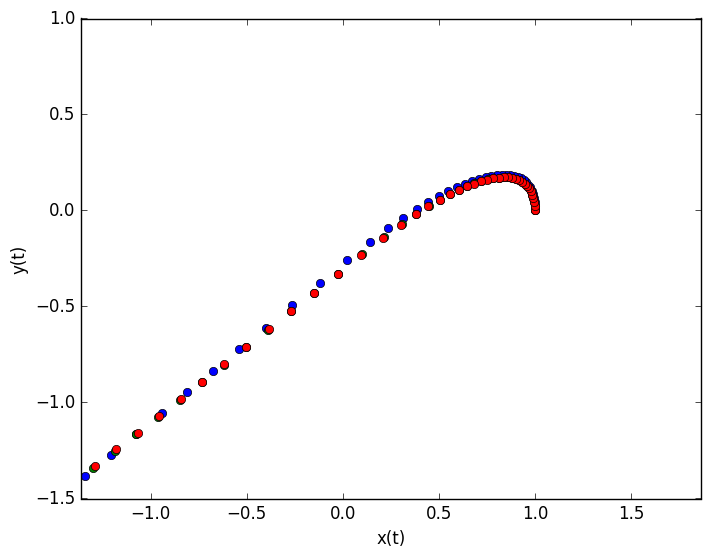

(-1.5,1)

In [7]:
#a)
#Vxprime = G*m*(x/((x^2 + y^2)^(3/2)))
#Vyprime = G*m*(y/((x^2 + y^2)^(3/2)))
#xprime = Vx
#yprime = Vy

G=1
m = 1

f(t,x) = [x[3];x[4];(-x[1]/((x[1]^2 + x[2]^2)^(3/2)));(-x[1]/((x[2]^2 + x[1]^2)^(3/2)))]

y0 = [1;0;0;0.6]
t0 = 0
deltat = 0.04
N = 250

(t_fe, x_fe) = forwardeuler(f, y0, t0, deltat, N)
(t_rk2, x_rk2) = rungekutta2(f, y0, t0, deltat, N)
(t_rk4, x_rk4) = rungekutta4(f, y0, t0, deltat, N) 

plot(x_fe[1,:],x_fe[2,:],"bo-", label="Forward Euler Orbit")
plot(x_rk2[1,:],x_rk2[2,:],"go-", label="Runge Kutta 2 Orbit")
plot(x_rk4[1,:],x_rk4[2,:],"ro-", label="Runge Kutta 4 Orbit")

xlabel("x(t)")
ylabel("y(t)")
axis("equal")
xlim(-1, 1.5)
ylim(-1.5,1)
#legend(loc="upper left") #legend wont work

#They all look very similar to me